In [31]:
import csv
import matplotlib.pyplot as plt

csv_file = '../data/driving_log.csv'
samples = []
with open(csv_file, 'r') as f:
    reader = csv.reader(f)
    samples = [line for line in reader]
    samples = samples[1]

print(len(samples))

7


In [32]:
import random
from skimage.util import random_noise
from skimage.transform import rotate
from skimage.exposure import adjust_gamma
import numpy as np
from scipy import ndimage
from sklearn.utils import shuffle

images = []

def get_img(source_path):
    img_folder = '../data/IMG/'
    current_path = img_folder + source_path.split('/')[-1]
    return ndimage.imread(current_path)

img_center = get_img(samples[0])

# Random noised
images.append(random_noise(img_center))

# Random rotation
images.append(rotate(img_center, random.uniform(-15, 15)))
# Blurred
images.append(ndimage.gaussian_filter(img_center, random.randrange(5, 15, 2)))
# Random birteness
images.append(adjust_gamma(img_center, gamma=random.uniform(0, 3), gain=1.))
images.extend([np.fliplr(img_center)])


print(len(images))

AttributeError: module 'scipy.ndimage' has no attribute 'imread'

3897


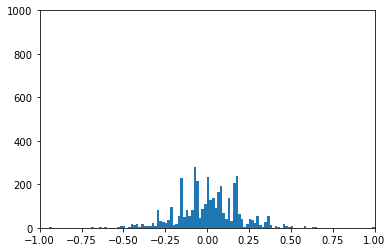

In [23]:
import random

random.shuffle(steering)

filtered_steering = list(filter(lambda s: float(s) != 0.0 or random.uniform(0, 1) > 0.95, steering))


print(len(filtered_steering))
plt.xlim([-1.0, 1.0])
plt.ylim([0, 1000])
plt.hist(filtered_steering, bins=len(set(filtered_steering)))
plt.show()

In [24]:
for s filtered_steering

SyntaxError: invalid syntax (<ipython-input-24-25b850fa8cca>, line 1)